To obtain the best fit line over single feature scattered datapoints
using Linear Regression


In [ ]:
# 1.	Load the basic libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 2.	Load the dataset

dataset = pd.read_csv("/content/Dataset.csv")
dataset.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [ ]:
# 3.	Analyse the dataset

dataset.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [ ]:
# 4. Pre-process the data

dataset = dataset.dropna()

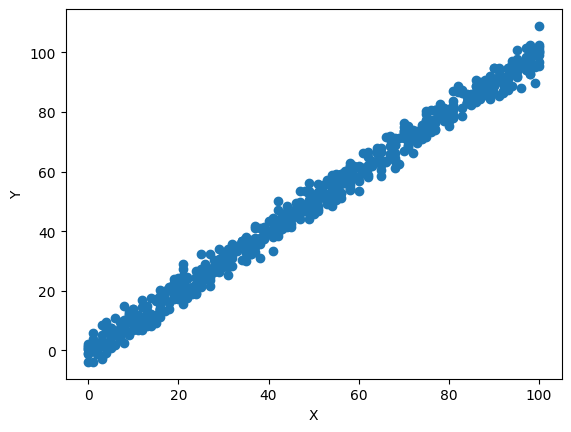

In [ ]:
# 5. Visualize the Data

plt.scatter(dataset['x'],dataset['y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# 6.	Separate the feature and prediction value columns

x_feature = np.array(dataset['x'])
y_feature = np.array(dataset['y'])

In [ ]:
# 7.Write the Hypothesis Function

def Hypothesis(theta_array , x) :
  return theta_array[0] + theta_array[1]*x

In [ ]:
# 8. Write the Cost Function

def  Cost_Function(theta_array,x,y , m):
  total_cost = 0
  for i in range(m):
    total_cost += (Hypothesis(theta_array,x[i]) - y[i])**2
  return total_cost/(2*m)

In [ ]:
# 9. Write the Gradient Descent optimization algorithm

def Gradient_Descent(theta_array , x, y , m ,alpha) :
  summation_0 = 0
  summation_1 = 0

  for i in range(m):
    summation_0 += (Hypothesis(theta_array,x[i]) - y[i])
    summation_1 += ((Hypothesis(theta_array,x[i]) - y[i])*x[i])

  new_theta0 = theta_array[0] - (alpha/m)*summation_0
  new_theta1 = theta_array[1] - (alpha/m)*summation_1

  new_theta = [new_theta0 , new_theta1]

  return new_theta

In [ ]:
# 10.	Apply the training over the dataset to minimize the loss

cost_values = []
def Training(x, y, alpha, epochs):
    theta_0 = 0
    theta_1 = 0
    theta_array = [theta_0, theta_1]
    m = len(x)


    for i in range(epochs):
        theta_array = Gradient_Descent(theta_array, x, y, m, alpha)
        loss = Cost_Function(theta_array, x, y, m)
        cost_values.append(loss)
        y_new = theta_array[0] + theta_array[1]*x

        if i == epochs-1 :
          plt.plot(x, y_new , 'r')
          plt.scatter(x, y)
          plt.show()


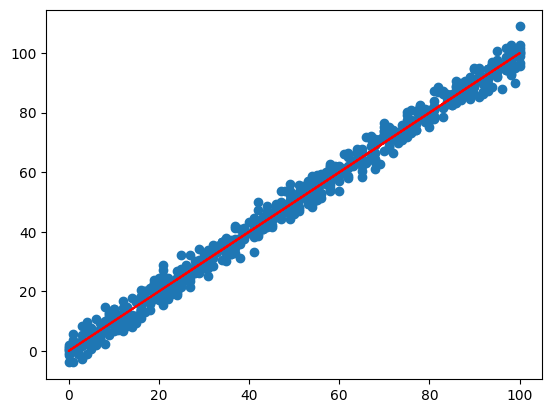

In [ ]:
# 11.	Find the best fit line to the given dataset

alpha = 0.0001
epochs = 100
Training(x_feature  , y_feature , alpha , epochs)

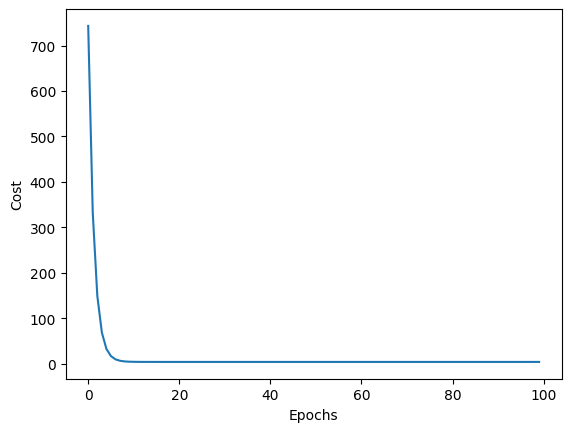

In [ ]:
# 12.	Observe the cost function vs iterations learning curve

x = np.arange(0, epochs)
plt.plot(x, cost_values)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()